In [1]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 34.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [3]:
!apt-get -y install mysql-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl libfcgi-bin libfcgi-perl
  libfcgi0ldbl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2 libprotobuf-lite23
  liburi-perl mecab-ipadic mecab-ipadic-utf8 mecab-utils mysql-client-8.0 mysql-client-core-8.0
  mysql-server-8.0 mysql-server-core-8.0
Suggested packages:
  libdata-dump-perl libipc-sharedcache-perl libbusiness-isbn-perl libwww-perl mailx tinyca
The following NEW packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl libfcgi-bin libfcgi-perl
  libfcgi0ldbl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2 libprotobuf-l

In [4]:
!service mysql start

 * Starting MySQL database server mysqld
su: warning: cannot change directory to /nonexistent: No such file or directory
   ...done.


In [5]:
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH 'mysql_native_password' BY 'root';FLUSH PRIVILEGES;"

In [6]:
import mysql.connector

# Create a connection to the MySQL server
conn = mysql.connector.connect(user='root', password='root', host='localhost')

# Create a cursor to interact with the MySQL server
cursor = conn.cursor()

In [7]:
# Create a new database named 'library'
cursor.execute("CREATE DATABASE IF NOT EXISTS DB_RECEIPE")

# Switch to the 'library' database
cursor.execute("USE DB_RECEIPE")

# Create the 'books' table
cursor.execute('''
CREATE TABLE IndianReceipe(
	ID int NOT NULL,
	RecipeName varchar(500) NULL,
	Ingredients varchar(4000) NULL,
	PrepTimeInMins int NULL,
	CookTimeInMins int NULL,
	TotalTimeInMins int NULL,
	Servings int NULL,
	Cuisine varchar(500) NULL,
	Course varchar(500) NULL,
	Diet varchar(500) NULL,
	Instructions varchar(4000) NULL
)
''')

# Always remember to close the cursor and connection when done
cursor.close()
conn.close()

In [30]:
from google.colab import files
uploaded = files.upload()
#upload file: 'DataDump.sql' here

Saving DataDump.sql to DataDump.sql


In [9]:
!mysql -u root -proot DB_RECEIPE < DataDump.sql

mysql: [Warning] Using a password on the command line interface can be insecure.


In [10]:
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='DB_RECEIPE')

# Fetch data into a pandas DataFrame
query = "SELECT * FROM IndianReceipe"
df = pd.read_sql(query, conn)

<ipython-input-10-09e1073414a0>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [11]:
import mysql.connector

# Connect to the MySQL server and the 'library' database
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='DB_RECEIPE')
cursor = conn.cursor()

# Execute the SELECT query
cursor.execute("SELECT * FROM IndianReceipe")

# Fetch all the results
records = cursor.fetchall()

# Print the records
for record in records:
    print(record)

# Close the cursor and connection
cursor.close()
conn.close()

(1, 'Masala Karela Recipe', '6 Karela (Bitter Gourd/ Pavakkai) - deseeded,Salt - to taste,1 Onion - thinly sliced,3 tablespoon Gram flour (besan),2 teaspoons Turmeric powder (Haldi),1 tablespoon Red Chilli powder,2 teaspoons Cumin seeds (Jeera),1 tablespoon Coriander Powder (Dhania),1 tablespoon Amchur (Dry Mango Powder),Sunflower Oil - as required', 15, 30, 45, 6, 'Indian', 'Side Dish', 'Diabetic Friendly', 'To begin making the\xa0Masala Karela Recipe,de-seed the karela and slice. Do not remove the skin as the skin has all the nutrients.\xa0Add the karela to the pressure cooker with 3 tablespoon of water, salt and turmeric powder and pressure cook for three whistles. Release the pressure immediately and open the lids. Keep aside.Heat oil in a heavy bottomed pan or a kadhai. Add cumin seeds and let it sizzle.Once the cumin seeds have sizzled, add onions and saute them till it turns golden brown in color.Add the karela,\xa0red chilli powder, amchur powder, coriander powder and besan. St

In [32]:
def take_inputs_until_enter():
    inputs = []
    print("Enter Ingridients available: ")
    while True:
        user_input = input()
        if user_input == '':
            break
        inputs.append(user_input)
    return inputs

igds = take_inputs_until_enter()

print("Inputs:", igds)

Enter Ingridients available: 
Coconut
Rice

Inputs: ['Coconut', 'Rice']


<ipython-input-34-4c843fc71e09>:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,RecipeName,Diet,Cuisine,Course,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Instructions,ID
0,Chettinad Sweet Paniyaram Recipe - Chettinad Sweet Paniyaram Recipe,Vegetarian,Chettinad,Snack,"1 cup idli dosa mixture, 4 tablespoons rice rava, 1/3 cup jaggery, 3 tablespoons coconut - grated, 1 tablespoon of cardamom powder, salt - as per taste, water - as per use, oil - as per use",5,20,25,10,"To make the Chettinad sweet paniyaram recipe, firstly mix and mix idli dosa mixture, rice rava, jaggery, coconut, salt, elaichi powder, some water in a mixing bowl. Keep aside for 5 minutes and mix again. Heat the paniyaram pan and add some oil to each hole. After heating, add the mixture to it and cover it. Cook on low heat. Once cooked from one side, flip it and cook from the other side. Cook on both sides until golden. Remove from pan and serve. Serve the Chettinad Sweet Paniyaram Recipe with Masala Tea or Filter Coffee for an evening snack.",27
1,Thengai Sadam Recipe (A Quick and Healthy Coconut Rice),Vegetarian,South Indian Recipes,Lunch,"1 cup Fresh coconut - grated,2-1/2 cups Cooked rice,1 teaspoon Mustard seeds,2 teaspoons White Urad Dal (Split),2 teaspoons Chana dal (Bengal Gram Dal),1 Raw Peanuts (Moongphali) - fistful,1 sprig Curry leaves,3 or 4 Green Chillies - finely chopped,1 teaspoon Ginger - grated,1 + 1 tablespoon Coconut Oil,Salt - to taste",30,30,60,4,"To begin cooking the Thengai Sadam (Coconut Rice Recipe), heat a tablespoon of coconut oil in a heavy bottomed pan or wok. Add the mustard seeds to the oil, and once it begins to crackle, add in the urad dal, channa dal and the peanuts.Once the dals begins to brown, add the green chillies, curry leaves and ginger and stir them together for a few minutes.Next, add in the coconut to the kadai and mix them all together. Care should be taken to avoid any moisture remaining in the mixture, therefore keep stirring it properly until all the moisture in the coconut evaporates. At this stage, stir in the cooked rice and salt and combine all the ingredients well. Add a tablespoon of coconut oil to it to separate the grains of the rice. Finally, add a tablespoon of coconut oil to the Thengai Sadam, to separate the grains of the rice. Stir fry gently to combine all the ingredient taking care and ensuring that the rice does not get mashed, in the process. Once combined, turn the heat to low and simmer for a couple of minutes. Turn off the heat and serve the Thengai Sadam (Coconut Rice) hot with a potato roast and papad.",84
2,Karwar Style Ambade Udid Methi Recipe - Hog Plum Curry,Vegetarian,Coastal Karnataka,Lunch,"5 Hog Plum (Amtekai) - (Ambade),3/4 cup Fresh coconut - grated,1/4 teaspoon Turmeric powder (Haldi),1 tablespoon Coriander (Dhania) Seeds,1 teaspoon Black Urad Dal (Split),1 teaspoon Rice - (raw rice),1/4 teaspoon Methi Seeds (Fenugreek Seeds),6 Whole Black Peppercorns,4 Dry Red Chilli,2 tablespoons Jaggery,1 pinch Asafoetida (hing),1 Karela (Bitter Gourd/ Pavakkai) - (Small),Salt - to taste,2 teaspoons Sunflower Oil,2 teaspoons Sunflower Oil,1/2 teaspoon Mustard seeds,1 pinch Asafoetida (hing)",25,25,50,4,"To begin making the Karwar Style Ambade Udid Methi Recipe (Hog Plum Curry), firstly, scrape away the outer layer of the bitter gourd, clean it from inside and cut it into thin rings. Apply a bit of salt to it (I used 1/4 teaspoon), toss well to coat and keep aside for about an hour to do away with the bitterness of bitter gourd. After an hour, wash the chopped bitter gourd thoroughly and keep aside to drain. Use a little oil and roast the bitter gourd rings on low heat in a kadai till crisp. Peel and clean the Ambade meanwhile when the bitter gourd is roasting on low heat. Heat a little oil in a kadai (a few drops each time) and lightly roast the coriander seeds, urad dal, methi seeds, rice grains, peppercorns, asafoetida piece and dry red chillies separately on low heat.As soon as each ingredient changes its colour, remove from flame and keep aside t

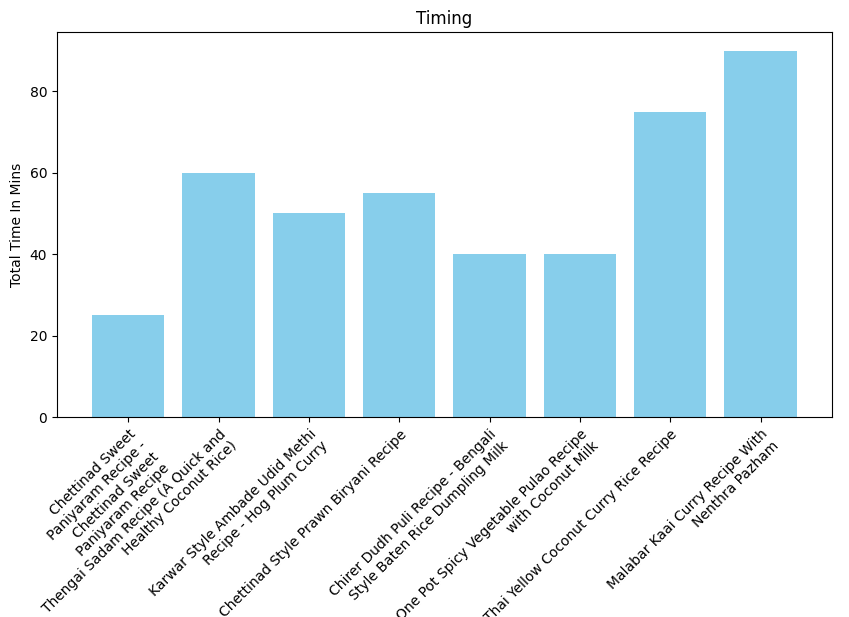

In [34]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

# Connect to the MySQL server and the 'library' database
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='DB_RECEIPE')
cursor = conn.cursor()

conditions = ' AND '.join(f"Ingredients LIKE '%{word}%'" for word in igds)

# Use a SELECT query to retrieve rows that contain any of the specified words
query = f"SELECT * FROM IndianReceipe WHERE {conditions}"

cursor.execute(query)
# Fetch all the rows that match the condition
result = cursor.fetchall()

df = pd.read_sql(query, conn)
#print(df)

pd.set_option('display.max_colwidth', None)

# Define the column name for which you want to increase the width
target_column = 'Instructions'

desired_order = ['RecipeName','Diet','Cuisine','Course','Ingredients','PrepTimeInMins','CookTimeInMins','TotalTimeInMins','Servings','Instructions','ID']

# Reorder the columns in-place
df = df[desired_order]

# Apply some basic styling
styled_df = df.style \
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'}) \
    .set_table_styles([{'selector': 'thead','props': [('max-width', '200px'), ('word-wrap', 'break-word'),('border', '1px solid black')]}])

# Display the styled DataFrame
display(styled_df)

# Plot a graph
plt.figure(figsize=(10, 5))
plt.bar(df['RecipeName'], df['TotalTimeInMins'], color='skyblue')
plt.xticks(rotation=45, ha='right', wrap=True)
plt.xlabel('Recipe Name',wrap=True)
plt.ylabel('Total Time In Mins')
plt.title('Timing')
plt.show()

# Close the cursor and connection
cursor.close()
conn.close()